In [4]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import math
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.preprocessing import minmax_scale
from numpy import std, mean
import statistics
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector


#Import File
global all_df
all_df=pd.read_csv('TrainDataset2023.csv', index_col=False) #Read from File
all_df.drop('ID', axis=1, inplace=True) # Drop ID - not needed for training

all_df.head() 

pCR (outcome)  RelapseFreeSurvival (outcome)   Age  ER  PgR  HER2  \
0              1                          144.0  41.0   0    0     0   
1              0                          142.0  39.0   1    1     0   
2              1                          135.0  31.0   0    0     0   
3              0                           12.0  35.0   0    0     0   
4              0                          109.0  61.0   1    0     0   

   TrippleNegative  ChemoGrade  Proliferation  HistologyType  ...  \
0                1           3              3              1  ...   
1                0           3              3              1  ...   
2                1           2              1              1  ...   
3                1           3              3              1  ...   
4                0           2              1              1  ...   

   original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                       0.517172   
1                                       0.444391   
2                                       0.534549   
3                                       0.506185   
4                                       0.462282   

   original_glszm_SmallAreaLowGrayLevelEmphasis  original_glszm_ZoneEntropy  \
0                                      0.375126                    3.325332   
1                                      0.444391                    3.032144   
2                                      0.534549                    2.485848   
3                                      0.506185                    2.606255   
4                                      0.462282                    2.809279   

   original_glszm_ZonePercentage  original_glszm_ZoneVariance  \
0                       0.002314                  3880771.500   
1                       0.005612                  2372009.744   
2                       0.006752                  1540027.421   
3                       0.003755                  6936740.794   
4                       0.006521                  1265399.054   

   original_ngtdm_Busyness  original_ngtdm_Coarseness  \
0               473.464852                   0.000768   
1                59.459710                   0.004383   
2                33.935384                   0.007584   
3                46.859265                   0.005424   
4                39.621023                   0.006585   

   original_ngtdm_Complexity  original_ngtdm_Contrast  original_ngtdm_Strength  
0                   0.182615                 0.030508                 0.000758  
1                   0.032012                 0.001006                 0.003685  
2                   0.024062                 0.000529                 0.006447  
3                   0.013707                 0.000178                 0.004543  
4                   0.034148                 0.001083                 0.005626  

[5 rows x 119 columns]

In [5]:
all_df.describe()

pCR (outcome)  RelapseFreeSurvival (outcome)         Age          ER  \
count     400.000000                     400.000000  400.000000  400.000000   
mean       12.697500                      56.000208   51.804674    0.547500   
std       111.107417                      27.137584   10.948522    0.498362   
min         0.000000                       0.000000   23.000000    0.000000   
25%         0.000000                      38.000000   44.516769    0.000000   
50%         0.000000                      55.000000   51.019507    1.000000   
75%         0.000000                      73.000000   60.000000    1.000000   
max       999.000000                     144.000000   79.603012    1.000000   

              PgR        HER2  TrippleNegative  ChemoGrade  Proliferation  \
count  400.000000  400.000000       400.000000  400.000000     400.000000   
mean     2.902500    2.797500         2.830000    9.875000       6.562500   
std     49.932114   49.937068        49.935558   86.092911      70.444284   
min      0.000000    0.000000         0.000000    1.000000       1.000000   
25%      0.000000    0.000000         0.000000    2.000000       1.000000   
50%      0.000000    0.000000         0.000000    2.000000       1.000000   
75%      1.000000    1.000000         1.000000    3.000000       2.000000   
max    999.000000  999.000000       999.000000  999.000000     999.000000   

       HistologyType  ...  original_glszm_SmallAreaHighGrayLevelEmphasis  \
count      400.00000  ...                                   4.000000e+02   
mean         8.63250  ...                                   3.957637e-01   
std         86.20034  ...                                   1.666319e-01   
min          1.00000  ...                                   7.050000e-11   
25%          1.00000  ...                                   3.199017e-01   
50%          1.00000  ...                                   4.095627e-01   
75%          1.00000  ...                                   5.000049e-01   
max        999.00000  ...                                   8.773779e-01   

       original_glszm_SmallAreaLowGrayLevelEmphasis  \
count                                  4.000000e+02   
mean                                   3.911005e-01   
std                                    1.615922e-01   
min                                    7.050000e-11   
25%                                    3.184398e-01   
50%                                    4.054695e-01   
75%                                    4.956920e-01   
max                                    8.571429e-01   

       original_glszm_ZoneEntropy  original_glszm_ZonePercentage  \
count                4.000000e+02                     400.000000   
mean                 2.722189e+00                       0.003347   
std                  7.648849e-01                       0.002419   
min                 -3.200000e-16                       0.000008   
25%                  2.340783e+00                       0.001389   
50%                  2.814884e+00                       0.002944   
75%                  3.304411e+00                       0.004798   
max                  4.947427e+00                       0.011301   

       original_glszm_ZoneVariance  original_ngtdm_Busyness  \
count                 4.000000e+02               400.000000   
mean                  5.679717e+07               178.311246   
std                   7.063846e+08              1045.453432   
min                   0.000000e+00                 0.000000   
25%                   1.030473e+06                18.760570   
50%                   3.277334e+06                67.929659   
75%                   9.079686e+06               157.370294   
max                   1.390001e+10             20764.693790   

       original_ngtdm_Coarseness  original_ngtdm_Complexity  \
count                 400.000000                 400.000000   
mean                32500.032620                   0.056935   
std                177545.921568                  

<AxesSubplot:xlabel='RelapseFreeSurvival (outcome)', ylabel='count'>

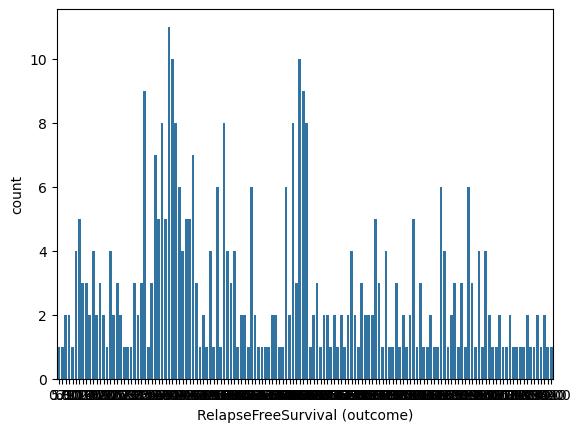

In [8]:
sns.countplot(x="RelapseFreeSurvival (outcome)", data=all_df)

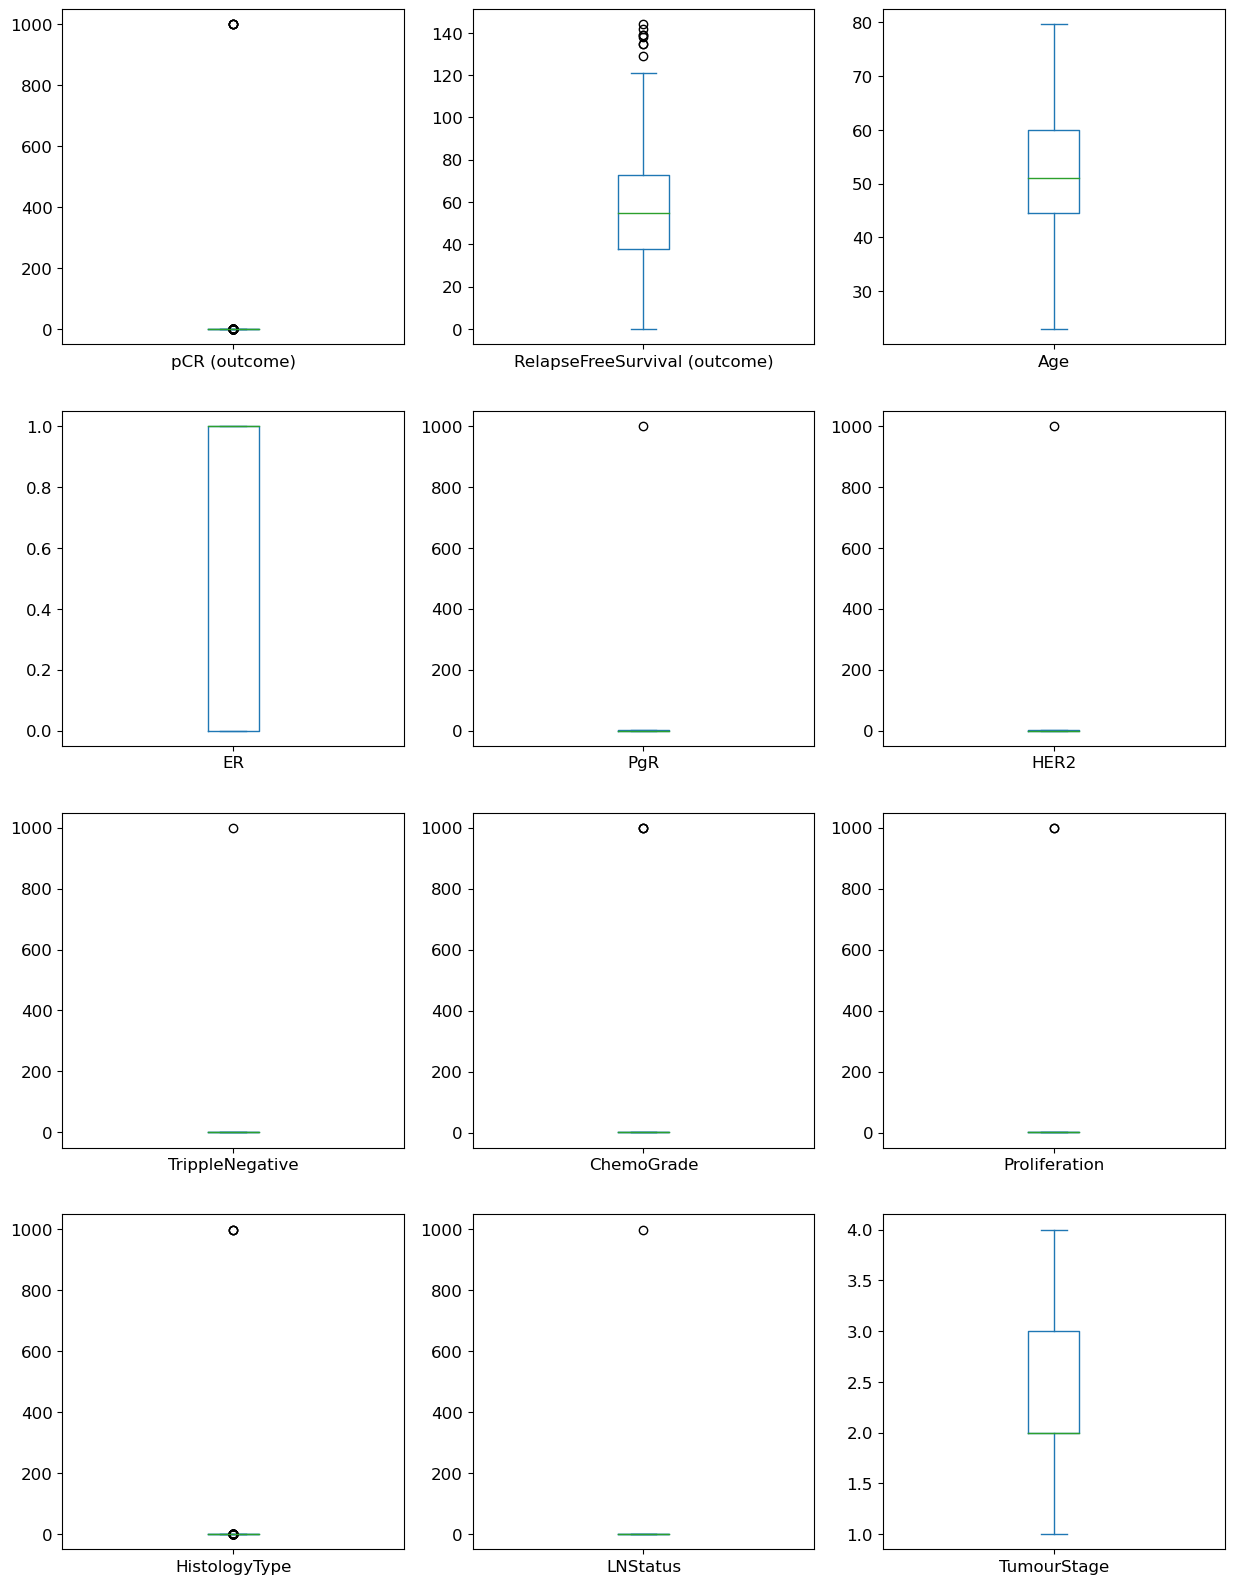

In [20]:
#Requires Data Imputation for a cleaner output
data_mean = all_df.iloc[:, 0:12]
data_mean.plot(kind='box', subplots=True, layout=(4,3), sharex=False,
sharey=False, fontsize=12, figsize=(15,20));

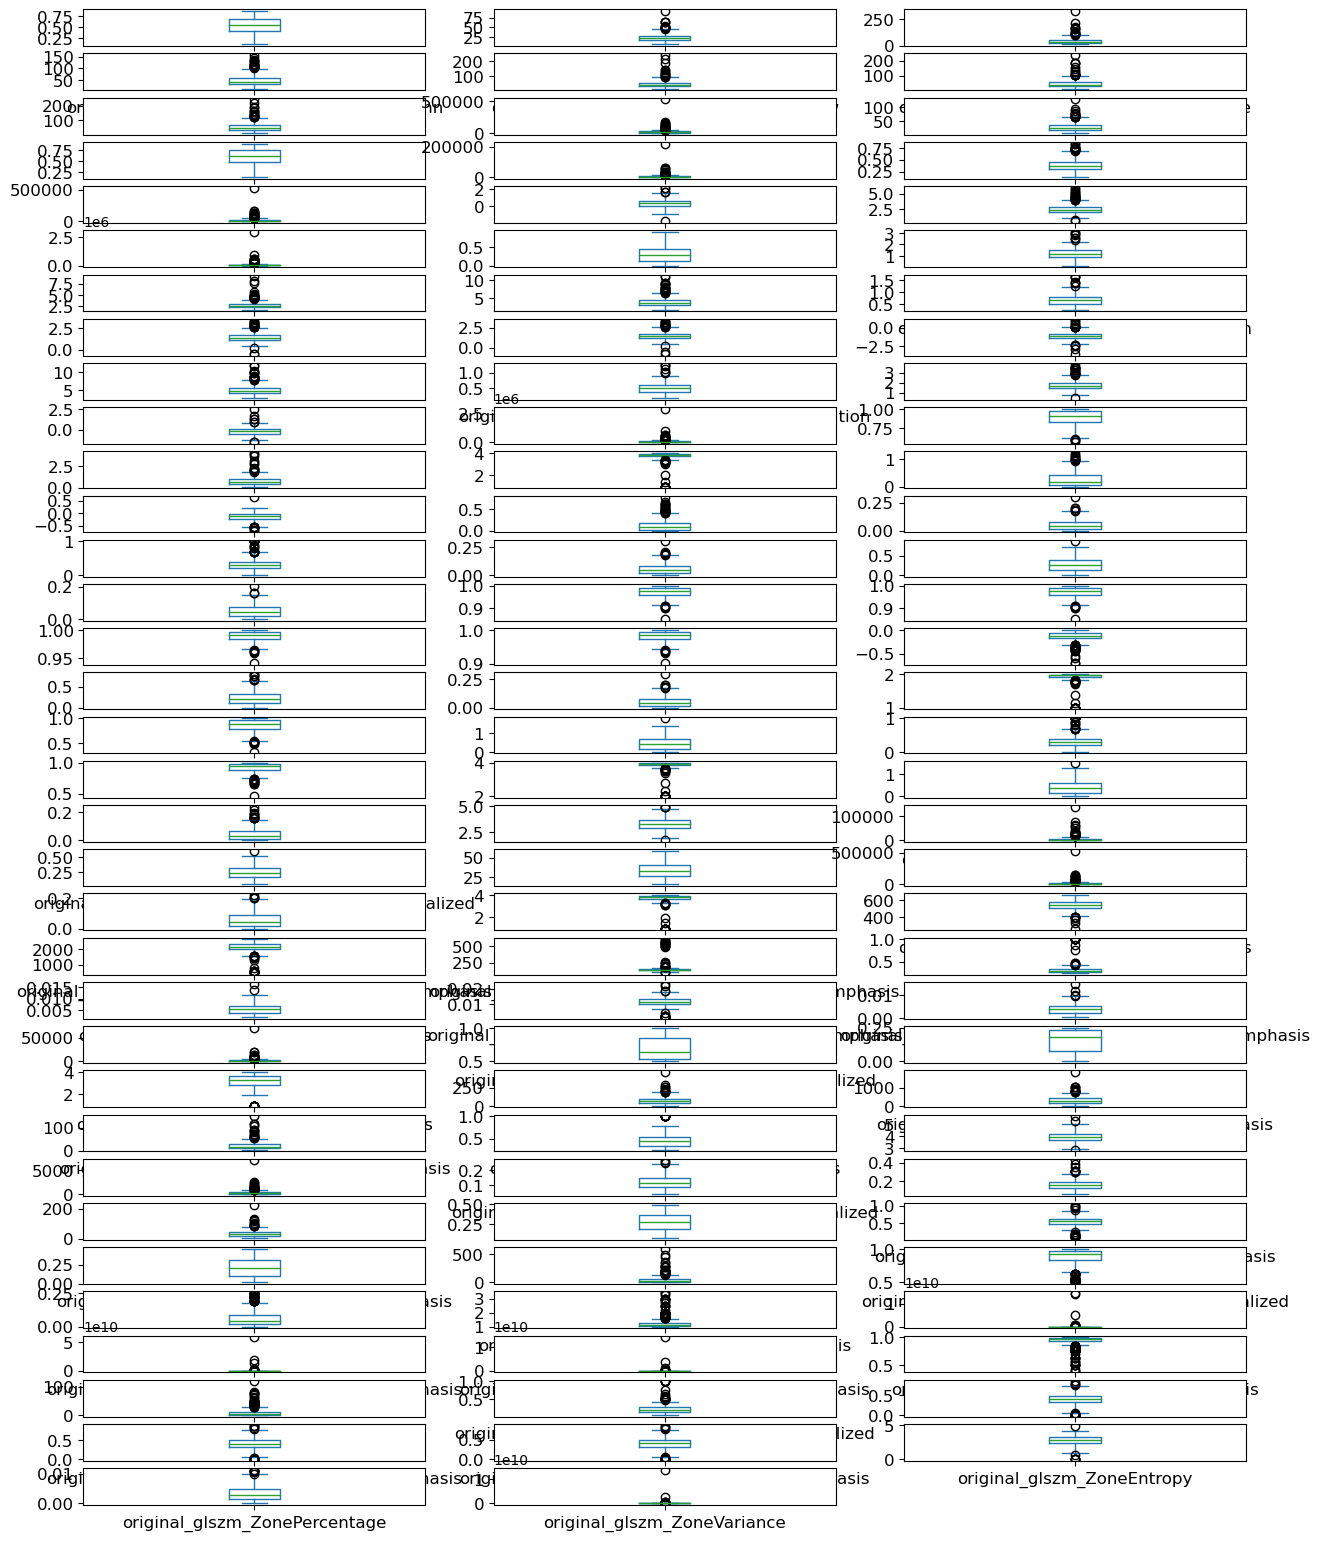

In [25]:
data_mean = all_df.iloc[:, 13:114]
data_mean.plot(kind='box', subplots=True, layout=(35,3), sharex=False,
sharey=False, fontsize=12, figsize=(15,20));

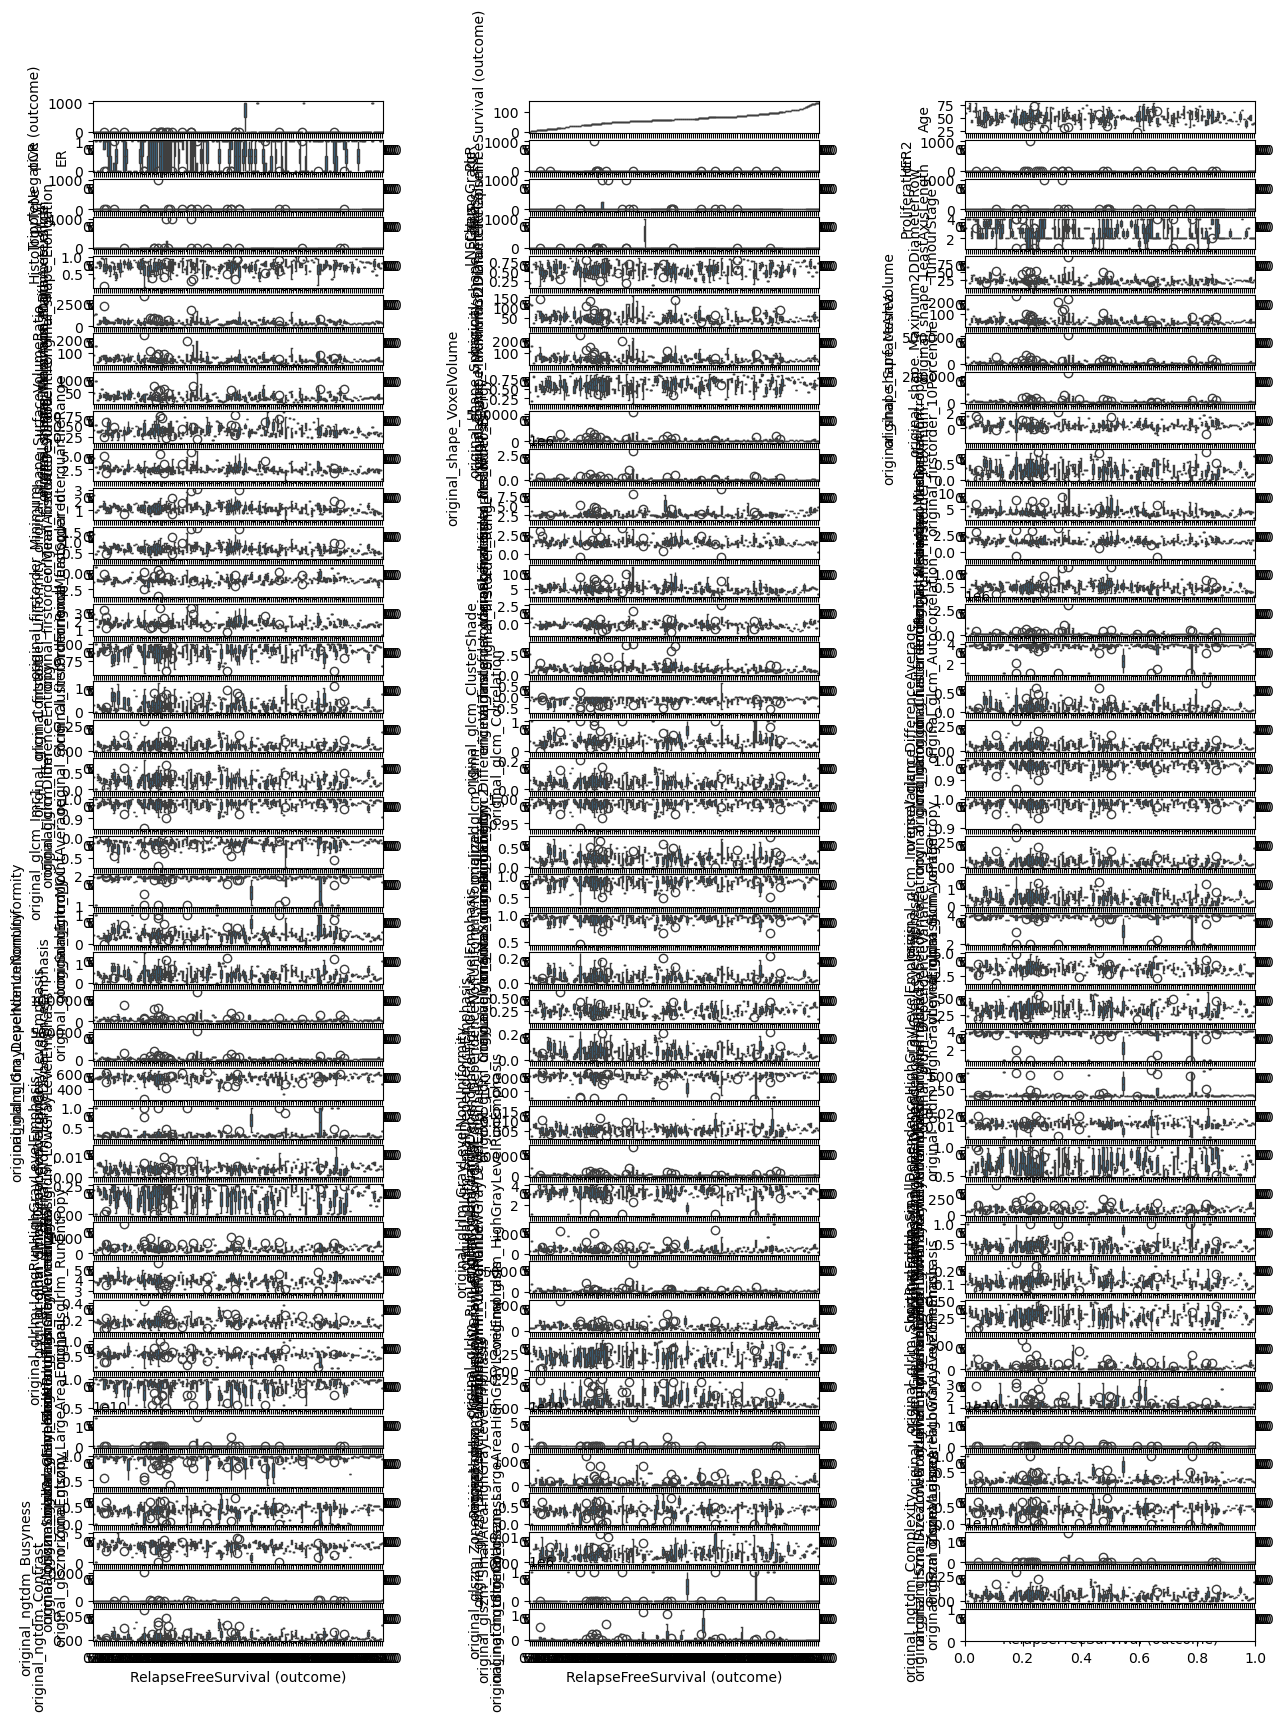

In [28]:
fig, axes = plt.subplots(nrows=40, ncols=3, figsize=(15,20))
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()
for i, col in enumerate(all_df.columns[:]):
    _= sns.boxplot(y=col, x='RelapseFreeSurvival (outcome)', data=all_df, ax=axes[i])

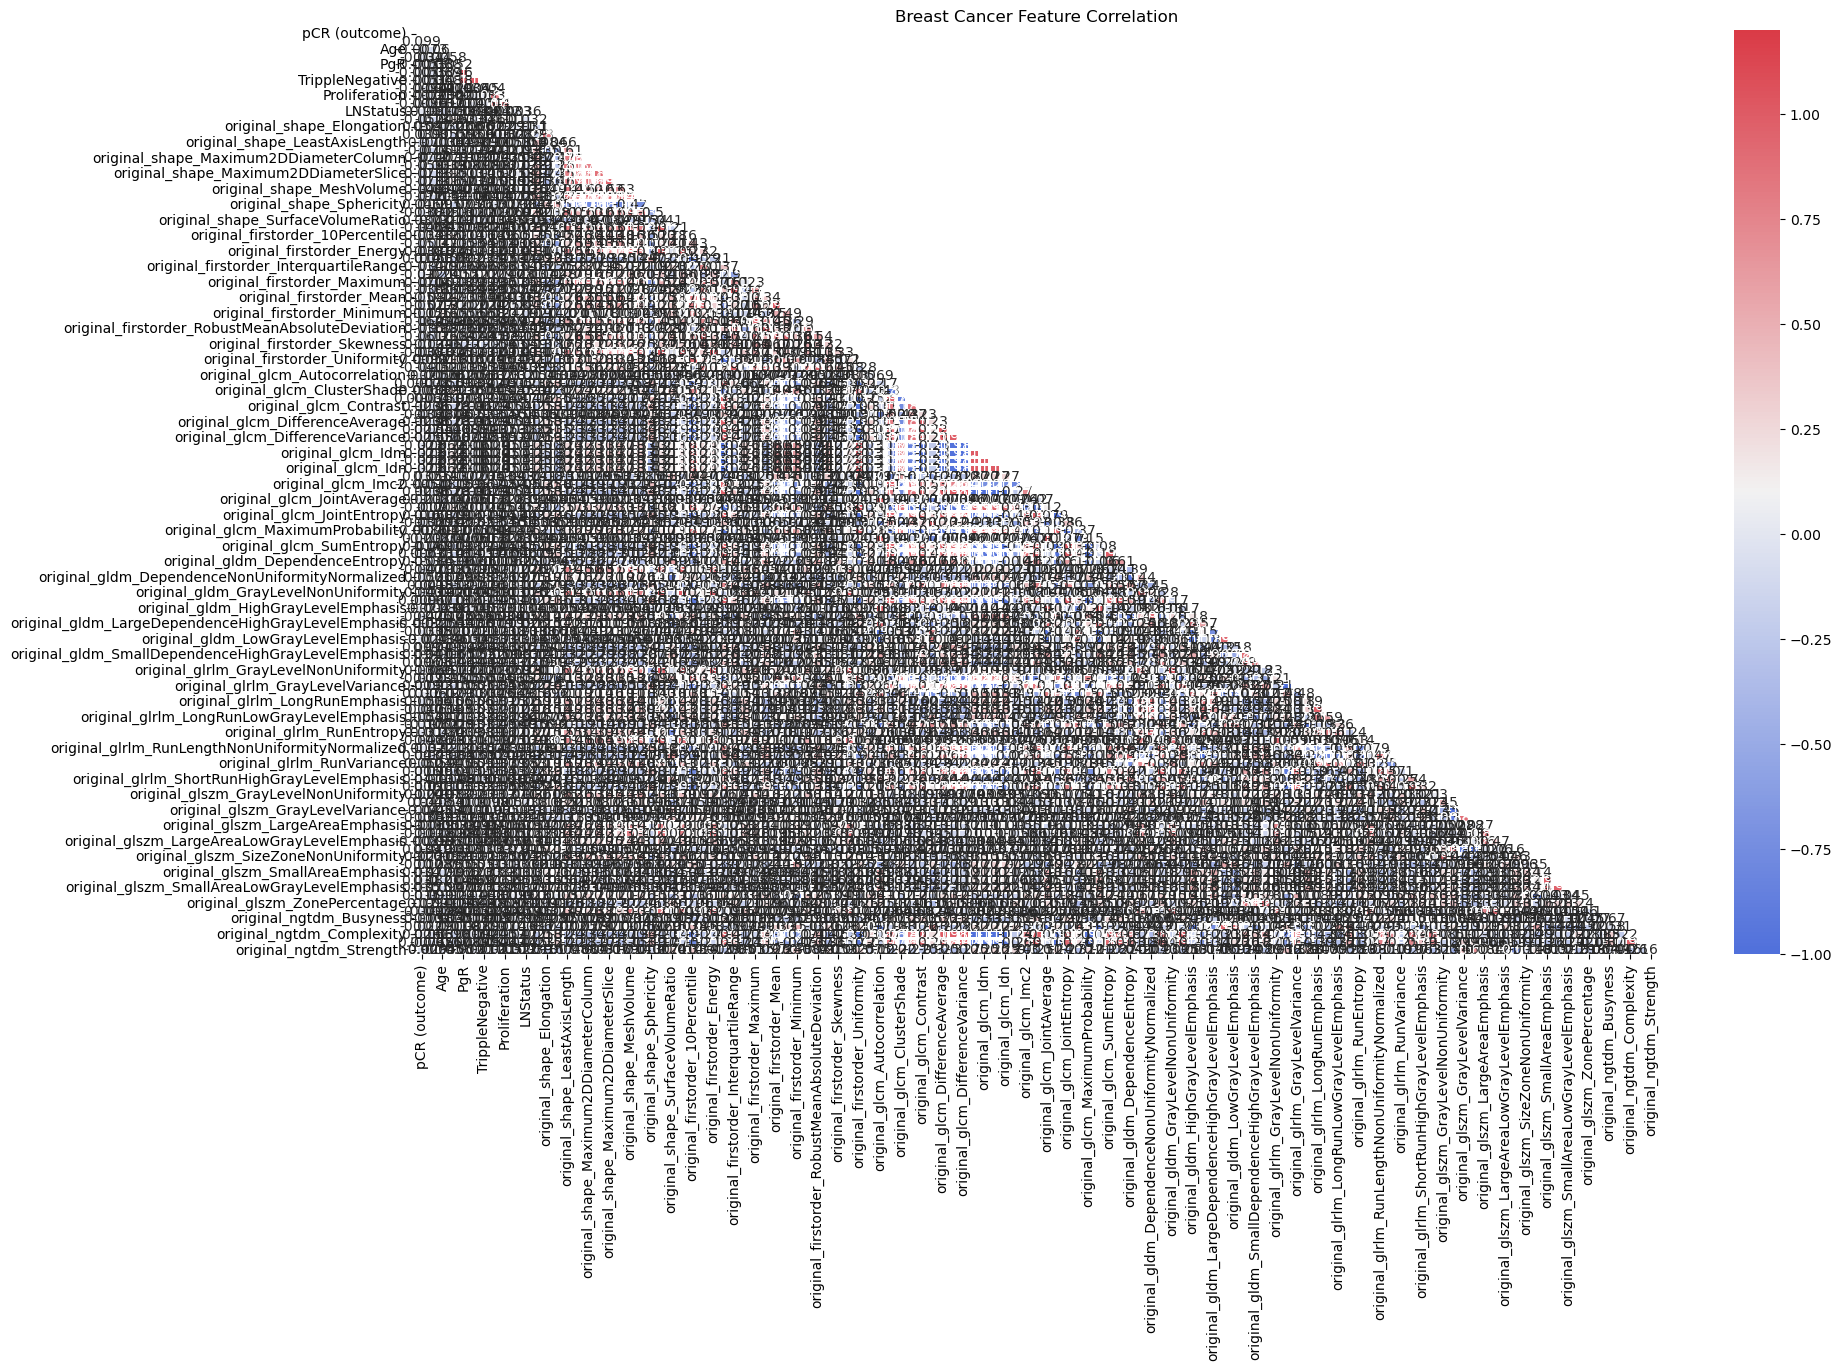

In [30]:
corrMatt = all_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Breast Cancer Feature Correlation')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=2);